In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

%matplotlib inline

### Generating noisy data

In [2]:
x = np.linspace(0,10, 100)
y = np.exp(-(x-5)**2/4)+np.random.randn(100)*0.25+1

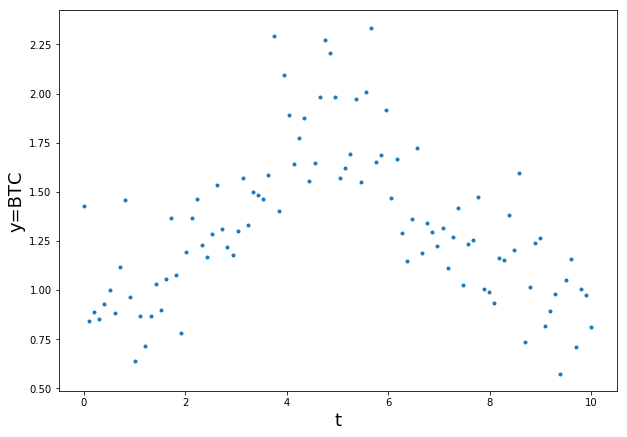

In [3]:
plt.figure(0,(10,7))
plt.xlabel("t", fontsize=18)
plt.ylabel("y=BTC", fontsize=18)
plt.plot(x,y, '.')

## Exponentially weighted averages

### Average

* We are interested in trends
* We want to reduce the noise
* To do this we want to compute local average (moving average)
* If we are in timestep t, we can only remember a few past values (window)
* $\beta$ weight parameter

\begin{equation}
V_{y_0} = 0\\
V_{y_1} = \beta V_{y_0} + (1-\beta)y_1\\
V_{y_2} = \beta V_{y_1} + (1-\beta)y_2\\
\vdots\\
V_{y_t} = \beta V_{y_{t-1}} + (1-\beta)y_t\\
\vdots
\end{equation}


Let's calculate the average for some $\beta$

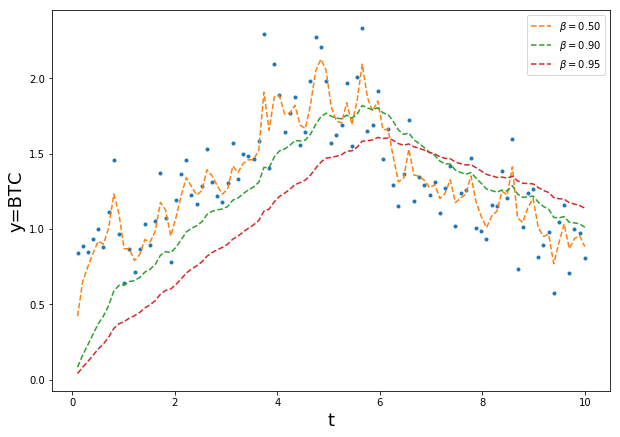

In [4]:
plt.figure(0,(10,7))
plt.xlabel("t", fontsize=18)
plt.ylabel("y=BTC", fontsize=18)
plt.plot(x[1:],y[1:], '.')


for beta in [0.5, 0.9, 0.95]:
    new_y = np.zeros_like(y)
    for t in range(1,len(y)):
        new_y[t] = beta*new_y[t-1]+(1-beta)*y[t]
    plt.plot(x[1:],new_y[1:], '--', label=r"$\beta=%.2f$"%beta)
plt.legend()

In [5]:
def exp_avg(beta):
    plt.figure(0,(10,7))
    plt.xlabel("t", fontsize=18)
    plt.ylabel("y=BTC", fontsize=18)
    plt.plot(x,y, '.')

    new_y = np.zeros_like(y)
    for t in range(1,len(y)):
        new_y[t] = beta*new_y[t-1]+(1-beta)*y[t]
    plt.plot(x,new_y, '--', label=r"$\beta=%.2f$"%beta)
    plt.legend()
    plt.show()
    
interact(exp_avg, beta=(0.5, 0.99, 0.01))

interactive(children=(FloatSlider(value=0.74, description='beta', max=0.99, min=0.5, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.exp_avg>

Meaning of $\beta$: we average $\approx\frac{1}{1-\beta}$ timestep.

* High $\beta$ (close to $1$): averages over a longer period. Smoother curve, slowly changes, it's shifted (delay in trend)
* Low $\beta$: averages over a few timestep. Less smooth curve, more sensitive to outliers.

Why exponentially weighted?
\begin{equation}
V_{y_t} = (1-\beta)y_t+\beta V_{y_{t-1}}= (1-\beta)y_t+\beta (1-\beta)y_{t-1} + \beta^2V_{y_{t-2}}=(1-\beta)y_t+\beta (1-\beta)y_{t-1} + \beta^2(1-\beta)y_{t-2}+\beta^3V_{y_{t-2}}=\dots\\
=(1-\beta)\sum_{i=t}^{0} \beta^{t-i}y_t
\end{equation}

So we calculate an average with $\beta^{t-i}$ weights

If we are in timestep 10, then the values before will count to this time step, but we decrease the weight of these past values exponentially.

Text(0,0.5,'weight')

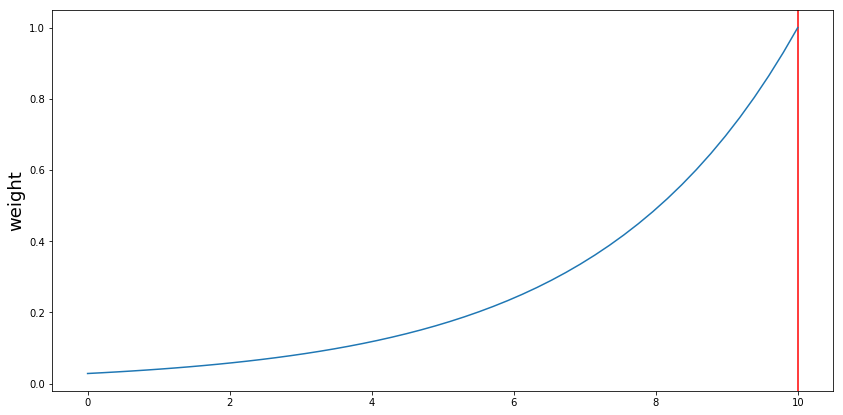

In [6]:
i=np.linspace(0,10)
w = np.power(0.7,i)
plt.figure(0,(14,7))
plt.axvline(x=10, c='r')
plt.plot(10-i,w)
plt.ylabel("weight", fontsize=18)

## Bias correction

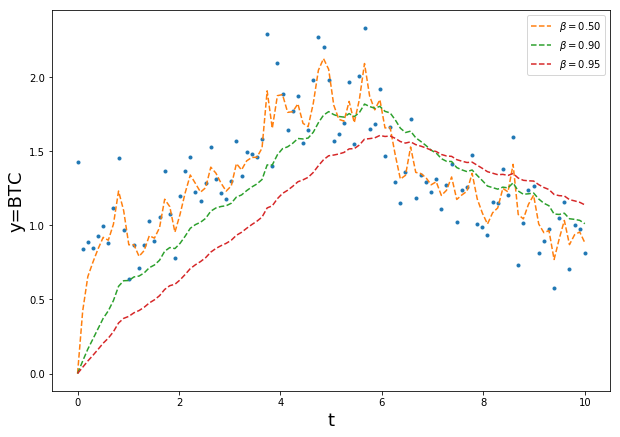

In [7]:
plt.figure(0,(10,7))
plt.xlabel("t", fontsize=18)
plt.ylabel("y=BTC", fontsize=18)
plt.plot(x,y, '.')


for beta in [0.5, 0.9, 0.95]:
    new_y = np.zeros_like(y)
    for t in range(1,len(y)):
        new_y[t] = beta*new_y[t-1]+(1-beta)*y[t]
    plt.plot(x,new_y, '--', label=r"$\beta=%.2f$"%beta)
plt.legend()

You may noticed before that the estimate of the average is pretty bad in the first few steps. The reason is the following:
 * $V_0=0$
 * $V_1 = \beta V_0+(1-\beta)y_1=(1-\beta)y_1$
 
 So  we will estimate the first elemnt with $(1-\beta)y_1$, which is $0.1y_1$ in case of $\beta=0.9$. We can correct this problem in the following way:
 
 \begin{equation}
 V_t^{\mathrm{bias-corrected}} = \frac{V_t}{1-\beta^t}
 \end{equation}

Why this solves the problem? In case of small $t$ the $1-\beta^t$ will be small, so it will remove the bias. In case of large $t$, because $\beta<1$ this will be close to $1$.

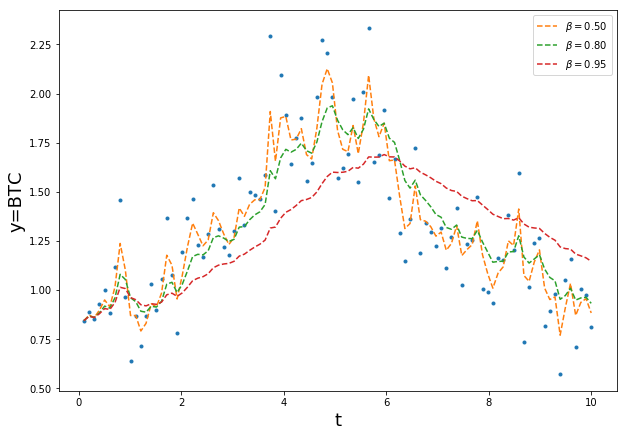

In [10]:
plt.figure(0,(10,7))
plt.xlabel("t", fontsize=18)
plt.ylabel("y=BTC", fontsize=18)
plt.plot(x[1:],y[1:], '.')


for beta in [0.5, 0.8, 0.95]:
    new_y = np.zeros_like(y)
    corr_y = np.zeros_like(y)
    for t in range(1,len(y)):
        new_y[t] = (beta*new_y[t-1]+(1-beta)*(y[t]))
        corr_y[t] = new_y[t]/float(1-beta**t)
    plt.plot(x[1:],corr_y[1:], '--', label=r"$\beta=%.2f$"%beta)
plt.legend()